In [7]:

import os
import glob2
import cv2
import time
import pandas as pd
import numpy as np
import random
from astropy.io import fits 
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from models.utils import image_checkerer

plt.style.use(astropy_mpl_style)

In [5]:
# Create list of lensed quasar candidates
datapath =  "../dataset/HSC-SSP_DR4_james"
fname_raw = "candidates_list_raw.txt"
fname_VI = "candidates_list_selected.txt"

img_list_full = glob2.glob(os.path.join(datapath, "fits_data", '*.fits'))
print(f"Check number of fits file in folder: {datapath}")
print(len(img_list_full))

with open(os.path.join(datapath, fname_raw)) as f:
    img_list_candidates = f.read().splitlines()
assert len(set(img_list_candidates)) == len(img_list_candidates), "candidates list not unique, check file"
print(f"Check number of candidates in: {fname_raw}")
print(len(img_list_candidates))

with open(os.path.join(datapath, fname_VI)) as f:
    img_list_VI = f.read().splitlines()
    assert len(set(img_list_VI)) == len(img_list_VI), "VI list not unique, check file"
print(f"Check number of candidates in: {fname_VI}")
print(len(img_list_VI))

Check number of fits file in folder: ../dataset/HSC-SSP_DR4_james
121870
Check number of candidates in: candidates_list_raw.txt
121870
Check number of candidates in: candidates_list_selected.txt
6199


### Import Hubble dataset lists

In [ ]:
# Split list into "non-selected" candidates by CHETAH
data_list = list(set(img_list_candidates)-set(img_list_VI))  # non VI
# data_list = img_list_VI

# Extract img from  randomly chosen candidate fits file 
for _ in range(10):
    idx = random.randint(0, len(data_list))
    fname = os.path.join(datapath, "fits_data", data_list[idx]+"_HSC-I_img.fits")
    hdulist = fits.open(fname)
    # print(hdulist.info())
    np_array = hdulist[1].data
    hdulist.close()

    # Plot img 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(16,6))
    fig.suptitle(fname)
    img1 = ax1.imshow(np_array, cmap='gray')
    fig.colorbar(img1)
    ax1.set_title("Linear color scale")
    img2 = ax2.imshow(np_array,  cmap='gray', norm=LogNorm())
    fig.colorbar(img2)
    ax2.set_title("LogNorm color scale")

    # sname = fname.replace(datapath,"dataset/VI_imgs").replace("_HSC-I_img.fits", ".png")
    sname = fname.replace("fits_data", "non_VI_imgs").replace("_HSC-I_img.fits", ".png")
    print(sname)
    plt.savefig(sname)

### Checking FITS file structure

In [45]:
info =  hdulist.info()
print(info)
print(hdulist.fileinfo)

Filename: ../dataset/Hubble_james/fits_data/J111545.60+014945.01_HSC-I_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 ImageHDU        33   (47, 47)   float32   
  2                1 ImageHDU        48   (47, 47)   int32   
  3                1 ImageHDU        33   (47, 47)   float32   
  4                1 BinTableHDU     40   1R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     16   1R x 1C   [1QB(5841)]   
None
<bound method HDUList.fileinfo of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f65e4f9f7c0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f65e91604f0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f65e604fa60>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f65e5e75370>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f65e4c20700>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f65e4f9f190>]>


In [ ]:
table1 = hdulist[4].data
print(table1)

In [39]:
table2 = hdulist[5].data
print(type(table2))
print(len(table2))
print(table2[0])
print(len(table2[0][0]))

<class 'astropy.io.fits.fitsrec.FITS_rec'>
1
(array([ 49,  32,  83, ..., 101, 116,  10], dtype=uint8))
5837


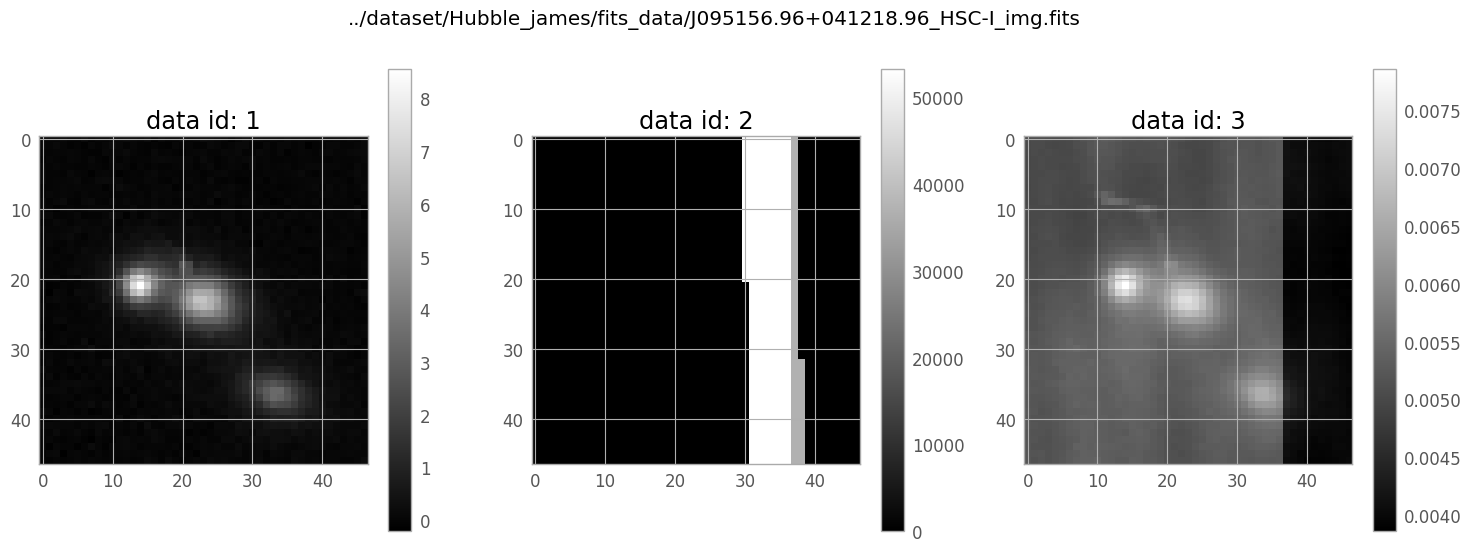

In [48]:
data_list = img_list_VI

# Extract img from  randomly chosen candidate fits file 
idx = random.randint(0, len(data_list))
fname = os.path.join(datapath, "fits_data", data_list[idx]+"_HSC-I_img.fits")
hdulist = fits.open(fname)

fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(18,6))
fig.suptitle(fname)
img=[]
for i in range(3):    
    img.append(axes[i].imshow(hdulist[i+1].data, cmap='gray'))
    fig.colorbar(img[i])
    axes[i].set_title(f"data id: {i+1}")

hdulist.close()


Text(0.5, 1.0, 'LogNorm color scale')

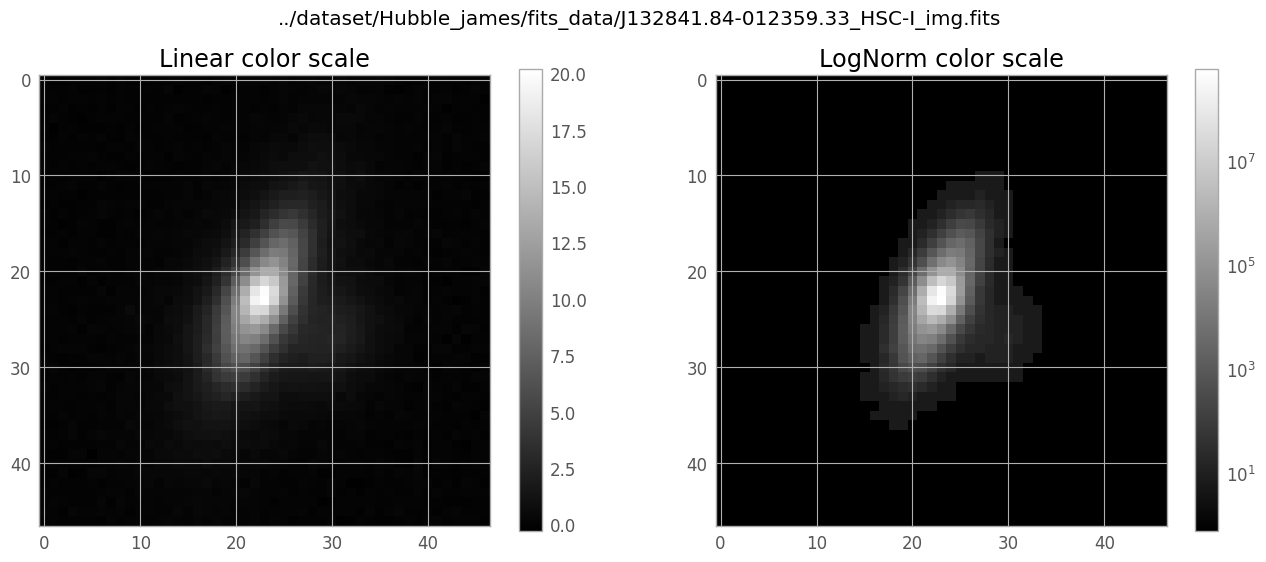

In [17]:
# Plot img 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(16,6))
fig.suptitle(fname)
img1 = ax1.imshow(img, cmap='gray')
fig.colorbar(img1)
ax1.set_title("Linear color scale")
img2 = ax2.imshow(np.exp(img),  cmap='gray', norm=LogNorm())
fig.colorbar(img2)
ax2.set_title("LogNorm color scale")


### Check tensor transform

In [59]:
import torchvision.transforms as T
import torch

print(np_array.shape)
np_array

(47, 47)


array([[-0.07379513, -0.05079101, -0.02620577, ..., -0.04738499,
        -0.0089366 ,  0.00658567],
       [ 0.09076854,  0.03601416, -0.06723697, ..., -0.01952278,
         0.04011561,  0.00325461],
       [ 0.08620437, -0.03580672,  0.01367071, ...,  0.05160679,
         0.11906581,  0.06334987],
       ...,
       [ 0.07078747, -0.06468969, -0.01948266, ..., -0.02109362,
         0.04076745,  0.03225418],
       [ 0.00093526,  0.02488354,  0.04633677, ..., -0.04084211,
        -0.00975086,  0.0600917 ],
       [ 0.13634507,  0.00122899, -0.00603176, ...,  0.06374781,
        -0.03775232, -0.06711029]], dtype=float32)

In [68]:
np_array2 = np_array.newbyteorder().byteswap()
print(f"Shape: {np_array2.shape}")
print(f"Min/Max: {np_array2.min()}/{np_array2.max()}")
np_array2

Shape: (47, 47)
Min/Max: -0.18843546509742737/6.433444499969482


array([[-0.07379513, -0.05079101, -0.02620577, ..., -0.04738499,
        -0.0089366 ,  0.00658567],
       [ 0.09076854,  0.03601416, -0.06723697, ..., -0.01952278,
         0.04011561,  0.00325461],
       [ 0.08620437, -0.03580672,  0.01367071, ...,  0.05160679,
         0.11906581,  0.06334987],
       ...,
       [ 0.07078747, -0.06468969, -0.01948266, ..., -0.02109362,
         0.04076745,  0.03225418],
       [ 0.00093526,  0.02488354,  0.04633677, ..., -0.04084211,
        -0.00975086,  0.0600917 ],
       [ 0.13634507,  0.00122899, -0.00603176, ...,  0.06374781,
        -0.03775232, -0.06711029]], dtype=float32)

In [78]:
transf = T.transforms.Compose([T.ToTensor(),                               
                               T.Resize((64,64), antialias=True),
                               T.Lambda(lambda x: (x - x.min() ) /  (x.max() - x.min())),
                            #    T.Normalize((0.), (0.), (0.)),
                                
                               ])
np_array3 = transf(np_array2)
print(f"Shape: {np_array3.shape}")
print(f"Min/Max: {np_array3.min()}/{np_array3.max()}")
np_array3



Shape: torch.Size([1, 64, 64])
Min/Max: 0.0/1.0


tensor([[[0.0093, 0.0114, 0.0141,  ..., 0.0173, 0.0203, 0.0217],
         [0.0246, 0.0224, 0.0182,  ..., 0.0212, 0.0229, 0.0214],
         [0.0345, 0.0273, 0.0198,  ..., 0.0278, 0.0284, 0.0243],
         ...,
         [0.0245, 0.0217, 0.0214,  ..., 0.0197, 0.0245, 0.0286],
         [0.0292, 0.0255, 0.0236,  ..., 0.0186, 0.0193, 0.0222],
         [0.0418, 0.0292, 0.0205,  ..., 0.0201, 0.0131, 0.0103]]])

### Plot FITS data from MNRAS2023 Chan paper (graded candidates)

In [64]:
chan_selection_path = "sample_images_MNRAS23-Chan"

# final 8 down-selected candidates from Chao et al(2021) 
list_paper_Caho2021 = ["J095921+020638", "J100050+013251", "J095921+025700", "J100307+020241", "J095943+022046", "J095744+023835", "J100050+031825", "J100129+024427" ]

with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeA")) as f:
    gradA = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeA-quad")) as f:
    gradAquads = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeB")) as f:
    gradB = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeC")) as f:
    gradC = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeG")) as f:
    gradG = f.read().splitlines()
    
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_knownQuasars")) as f:
    knowQuasars = f.read().splitlines()   

In [ ]:
data_list = knowQuasars  # knowQuasars, gradA, gradAquads, gradB, gradC image_checkerer
save_folder = "tmp"

for nameID in data_list:
    print(f"====  Searching for: {nameID}  ===")
    fnames = [fileID  for fileID in img_list_full if (nameID[1:5] == os.path.basename(fileID)[1:5] and nameID[5:10] == os.path.basename(fileID)[10:15]) ]
    print(f"FOUND {len(fnames)} occurances.")
    
    for fname in fnames:
        print()
        print(f"--- Reading: {fname} ---")
        hdulist = fits.open(fname)

        fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(18,6))
        fig.suptitle(fname)
        img=[]
        for i in range(3):    
            img.append(axes[i].imshow(hdulist[i+1].data, cmap='gray'))
            fig.colorbar(img[i])
            axes[i].set_title(f"data id: {i+1}")

        hdulist.close()
        plt.show()
        
        sname = fname.replace("fits_data",save_folder).replace("_HSC-I_img.fits", ".png")
        os.makedirs(os.path.dirname(sname), exist_ok=True)
        print(sname)
        # plt.savefig(sname)
    print()

### Save PNG of MNRAS2023 Chan paper (graded candidates)

In [69]:
chan_selection_path = "sample_images_MNRAS23-Chan"

# final 8 down-selected candidates from Chao et al(2021) 
list_paper_Caho2021 = ["J095921+020638", "J100050+013251", "J095921+025700", "J100307+020241", "J095943+022046", "J095744+023835", "J100050+031825", "J100129+024427" ]

with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeA.fullname")) as f:
    gradA_fname = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeA-quad.fullname")) as f:
    gradAquads_fname = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeB.fullname")) as f:
    gradB_fname = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeC.fullname")) as f:
    gradC_fname = f.read().splitlines()
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_gradeG.fullname")) as f:
    gradG_fname = f.read().splitlines()
    
with open(os.path.join(datapath,chan_selection_path, "MNRAS23-Chan_knownQuasars.fullname")) as f:
    knowQuasars_fname = f.read().splitlines()   
    
non_VI = list(set(img_list_candidates)-set(img_list_VI))  # non VI

====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J131606.18+045353.48_HSC-I_img.fits
../dataset/HSC-SSP_DR4_james/non_VI_png/J131606.18+045353.48.png
====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J134411.21-015523.60_HSC-I_img.fits
../dataset/HSC-SSP_DR4_james/non_VI_png/J134411.21-015523.60.png
====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J152717.60+430635.09_HSC-I_img.fits
../dataset/HSC-SSP_DR4_james/non_VI_png/J152717.60+430635.09.png
====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J133030.99+013645.11_HSC-I_img.fits
../dataset/HSC-SSP_DR4_james/non_VI_png/J133030.99+013645.11.png
====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J225942.12+001835.13_HSC-I_img.fits
../dataset/HSC-SSP_DR4_james/non_VI_png/J225942.12+001835.13.png
====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J143708.29-011612.70_HSC-I_img.fits
../dataset/HSC-SSP_DR4_james/non_VI_png/J143708.29-011612.70.png
====  Reading: ../dataset/HSC-SSP_DR4_james/fits_data/J013034.86+03200

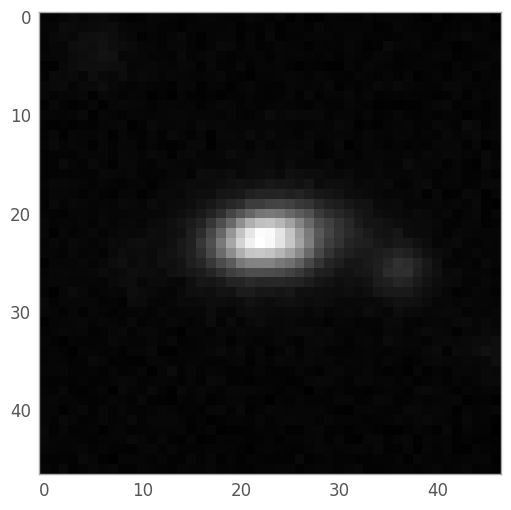

In [73]:
data_list = random.sample(non_VI, 15) # gradA_fname, gradAquads_fname, gradB_fname, gradC_fname, knowQuasars_fname, gradG_fname
save_folder = "non_VI_png" 

images = []
dname = os.path.dirname(img_list_full[0])
for entry in data_list:
    fname = os.path.join(dname, entry+"_HSC-I_img.fits")   
    print(f"====  Reading: {fname}")     
    hdulist = fits.open(fname)
    img_np = hdulist[1].data
    hdulist.close()
    img_np01 = (img_np - np.min(img_np)) / (np.max(img_np) - np.min(img_np))
    images.append(img_np)
    
    imgplot = plt.imshow(img_np01, cmap='gray')
    plt.grid(visible=False)
    # plt.colorbar(imgplot)
    # plt.show()
    
    sname = fname.replace("fits_data",save_folder).replace("_HSC-I_img.fits", ".png")
    os.makedirs(os.path.dirname(sname), exist_ok=True)
    print(sname)
    plt.savefig(sname)
    # cv2.imwrite(sname,np.int8(img_np01*255))

# images_selected = random.sample(images, 12)
# img_tile = image_checkerer(images_selected)


### Tutorial TSNE

In [3]:
from sklearn.manifold import TSNE
import torchvision
import numpy as np
import seaborn as sns
import pandas as pd

mnist = torchvision.datasets.MNIST('../../../01_GENERATIVE_AI/datasets')

In [6]:
x_train = mnist.data[:3000]
y_train = mnist.targets[:3000]
print(x_train.shape) 

x_mnist = np.reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)
# x_mnist[0]

torch.Size([3000, 28, 28])
torch.Size([3000, 784])


In [19]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.001s...
[t-SNE] Computed neighbors for 3000 samples in 0.356s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882415
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.386360
[t-SNE] KL divergence after 1000 iterations: 1.288969


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

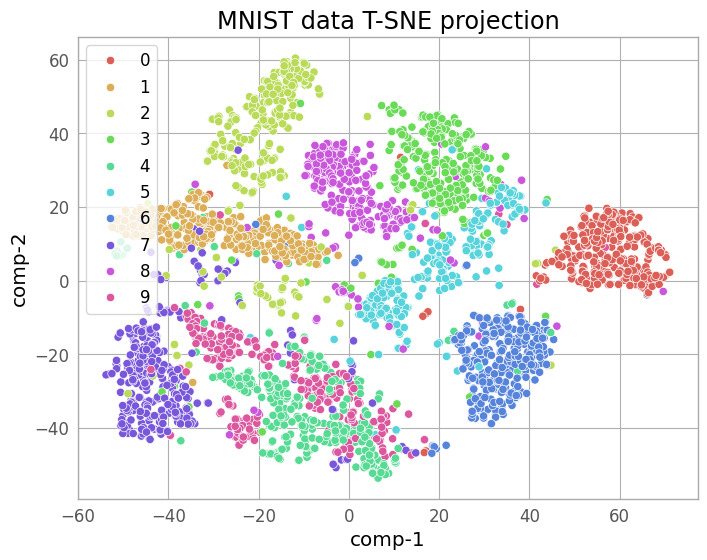

In [20]:
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

### Check HSC-SSP DR3 

In [62]:
fname = "/home/alcor/Downloads/ICSRC-0000318-000.fits"

hdulist = fits.open(fname)
print(hdulist.info())
np_array = hdulist[1].data
hdulist.close()

# Plot img 
# fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,  figsize=(16,6))
# fig.suptitle(fname)
# img1 = ax1.imshow(np_array, cmap='gray')
# fig.colorbar(img1)
# ax1.set_title("Linear color scale")
# img2 = ax2.imshow(np_array,  cmap='gray', norm=LogNorm())
# fig.colorbar(img2)
# ax2.set_title("LogNorm color scale")


Filename: /home/alcor/Downloads/ICSRC-0000318-000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1                1 BinTableHDU   1574   54R x 235C   [211X, 1K, 1D, 1D, 1K, 1D, 1D, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1E, 1D, 1D, 1E, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D

None


: 

In [60]:
datapath

'../dataset/Hubble_james'

### img augmentation check

In [114]:
import cv2
from torchvision import transforms as T
import torchvision

In [10]:
img = cv2.imread("lena.png")
img.shape

(514, 514, 3)

In [17]:
cv2.imshow("lena", img/255)
cv2.waitKey()

32

In [83]:
transfo1 = T.transforms.Compose(
                        [
                            T.ToTensor(), 
                            T.Resize((256,256), antialias=True),
                            T.Lambda(lambda x: (x - x.min() ) /  (x.max() - x.min()))
                        ])

img_transfo1 = transfo1(img)
print(img_transfo1.shape)

cv2.imshow("img_transfo1", img_transfo1[0].numpy())
cv2.waitKey()

torch.Size([3, 256, 256])


32

In [157]:
augment_transform = T.transforms.RandomChoice([
                                                # T.RandomPerspective(distortion_scale=0.3, p=1.0), 
                                                # T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
                                                T.RandomRotation(degrees=(-180, 180), interpolation=T.InterpolationMode.BILINEAR),
                                                T.RandomRotation(degrees=(90, 90)), 
                                                T.RandomRotation(degrees=(-90, -90)), 
                                                T.RandomRotation(degrees=(180, 180)),
                                                T.RandomHorizontalFlip(p=1), 
                                                T.RandomVerticalFlip(p=1)
                                                ])

transfo2 = T.transforms.Compose(
                        [
                            T.ToTensor(), 
                            T.Resize((256,256), antialias=True),
                            T.Lambda(lambda x: (x - x.min() ) /  (x.max() - x.min())),
                            T.RandomApply([augment_transform], p=0.8)
                        ])


In [158]:
img_transfo2 = transfo2(img)
print(img_transfo2.shape)

cv2.imshow("img_transfo2", img_transfo2[0].numpy())
cv2.waitKey()

torch.Size([3, 256, 256])


32

In [159]:

cv2.destroyAllWindows()

### plot KLD loss threshold studies (validation set)

In [26]:
data = pd.read_csv("./outputs/RESNET18VAE_BETATCVAE_split0.2_Dim128_KLw0.001_MI0.01_TC0.02/KLD_loss_threshold_study_ALL_dims.txt", index_col=0)
# data = pd.read_csv("./outputs/RESNET18VAE_BETATCVAE_split0.2_Dim128_KLw0.001_MI0.01_TC0.02/KLD_loss_threshold_study_6_dims.txt", index_col=0)

# data = pd.read_csv("./outputs/RESNET18VAE_BETATCVAE_split0.2_Dim128_KLw0.001_MI0.01_TC0.02_bal_aug0.8/KLD_loss_threshold_study_ALL_dims.txt", index_col=0)
# data = pd.read_csv("./outputs/RESNET18VAE_BETATCVAE_split0.2_Dim128_KLw0.001_MI0.01_TC0.02_bal_aug0.8/KLD_loss_threshold_study_5_dims.txt", index_col=0)

# data = pd.read_csv("./outputs/RESNET18VAE_BETATCVAE_split0.2_Dim128_KLw0.001_MI0.01_TC0.02_bal_aug0.8_old/KLD_loss_threshold_study_ALL_dims.txt", index_col=0)
# data = pd.read_csv("./outputs/RESNET18VAE_BETATCVAE_split0.2_Dim128_KLw0.001_MI0.01_TC0.02_bal_aug0.8_old/KLD_loss_threshold_study_8_dims.txt", index_col=0)

data

,precision,recall,f1-score
threshold,,,
0.025,0.08,0.90,0.14
0.050,0.08,0.84,0.14
0.075,0.09,0.76,0.15
0.100,0.10,0.66,0.17
0.150,0.13,0.44,0.20
0.200,0.19,0.29,0.23
0.250,0.31,0.20,0.24
0.275,0.40,0.16,0.23
0.300,0.49,0.13,0.21


<Axes: xlabel='threshold'>

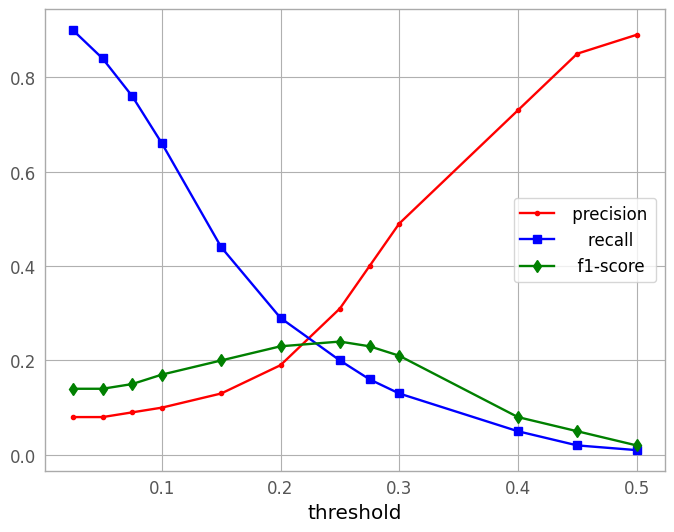

In [27]:
data.plot(style=['.-','s-','d-'] , color = ['r','b','g'], grid=True)